In [1]:
import numpy as np
import pandas as pd

project_name = 'SpatialCITE_skin_sr/joint'
exp_name = 'svae_skin_nn25'
scale = 2

In [2]:
raw_protein = pd.read_csv(f'result/{project_name}/reordered_filtered_protein.csv', index_col=0)
feature_name = raw_protein.keys()
dim = len(feature_name)
print(dim)

idx = pd.read_csv(f'result/{project_name}/position_enhance_with_center.csv')['Position']
fea = np.load(f'result/{project_name}/{exp_name}/infer_subspot.npy')[:, :dim]
grid = scale ** 2

mean_fea = np.zeros((fea.shape[0]//grid, fea.shape[1]))
spot_num = fea.shape[0]//grid
for i in range(spot_num):
    fea_sub = fea[i * grid :(i + 1) * grid]
    mean_fea[i] = np.mean(fea_sub, axis=0)

df = pd.DataFrame(fea, columns=feature_name, index=idx)
df.to_csv(f'result/{project_name}/{exp_name}_protein.csv')
df.to_csv(f'E:/Codes/Rcodes/DEanalysis/SpatialCITE/skin_sr/Protein/{exp_name}_protein.csv')

283


In [3]:
raw_gene = pd.read_csv(f'result/{project_name}/reordered_filtered_gene.csv', index_col=0)
feature_name = raw_gene.keys()
idx = pd.read_csv(f'result/{project_name}/position_enhance_with_center.csv')['Position']
fea = np.load(f'result/{project_name}/{exp_name}/infer_subspot.npy')[:, dim:]
grid = scale ** 2

mean_fea = np.zeros((fea.shape[0]//grid, fea.shape[1]))
spot_num = fea.shape[0]//grid
for i in range(spot_num):
    fea_sub = fea[i * grid :(i + 1) * grid]
    mean_fea[i] = np.mean(fea_sub, axis=0)

df = pd.DataFrame(fea, columns=feature_name, index=idx)
df.to_csv(f'result/{project_name}/{exp_name}_gene.csv')
df.to_csv(f'E:/Codes/Rcodes/DEanalysis/SpatialCITE/skin_sr/RNA/{exp_name}_gene.csv')

# Fig 5b | Gene and protein subpopulations (original)

In [4]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, fowlkes_mallows_score
from sklearn.metrics import normalized_mutual_info_score as nmi
from scipy.stats import wasserstein_distance as WD
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

project_name = 'SpatialCITE_skin_sr/joint'
region_gene = pd.read_csv(f'result/{project_name}/region_filt_label_0.75.csv', index_col=0)
region_protein = pd.read_csv(f'result/{project_name}/region_label_protein.csv', index_col=0)
# region_protein_hr = pd.read_csv(f'result/{project_name}/region_label_protein_hr.csv', index_col=0)
region_protein_hr = pd.read_csv(f'result/{project_name}/{exp_name}_pro_region_label.csv', index_col=0)
position = pd.read_csv(f'result/{project_name}/position_with_center.csv')
region_protein_filt = region_protein.loc[position['barcode']]

region_lr = pd.read_csv(f'result/{project_name}/region_filt_label_0.75.csv', index_col=0)
region_lr_filt = region_lr.loc[position['barcode']]

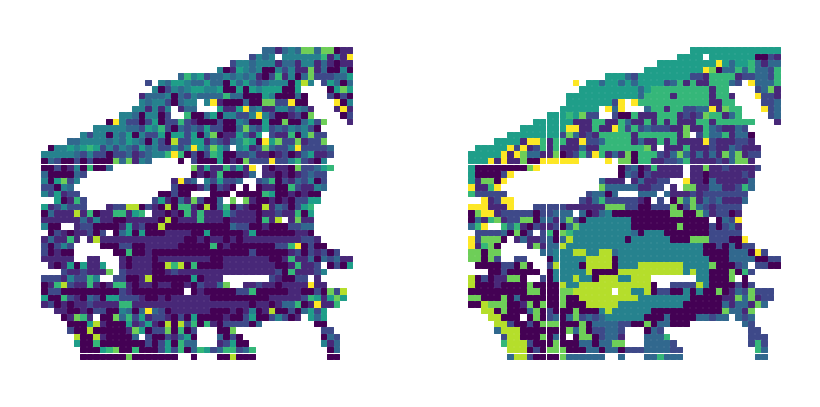

0.0394201610243388


In [5]:
row = position['row']
col = position['col']

width = 5/2 * np.mean(row)

size = 30
f_, ax_ = plt.subplots(figsize=(12, 6))
plt.axis("equal")

img_00 = plt.scatter(0 * width + row, - col, s=size,
                    marker='s',
                    c=region_gene['x'])

img_10 = plt.scatter(1 * width + row, - col, s=size,
                    marker='s',
                    c=region_protein_filt['x'])

plt.tight_layout()
plt.axis('off')
plt.show()

from sklearn.metrics import adjusted_rand_score as ari
print(ari(region_gene['x'], region_protein_filt['x']))

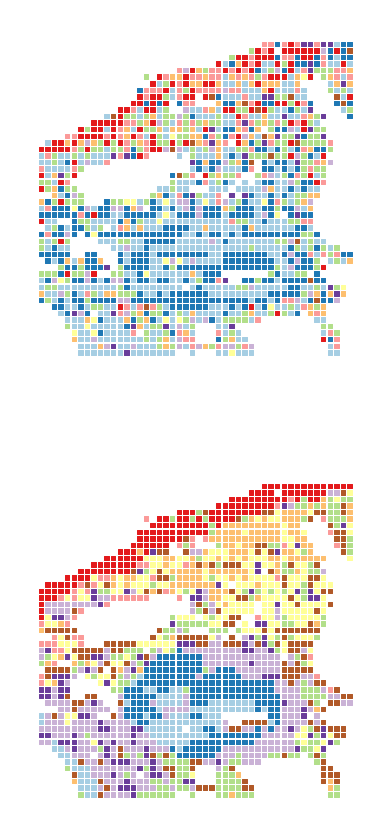

In [6]:
import numpy as np
from scipy.optimize import linear_sum_assignment
from sklearn.metrics import jaccard_score
from sklearn.metrics import adjusted_rand_score as ari

en_position = pd.read_csv(f'result/{project_name }/position_enhance_with_center.csv')

gene_label = region_gene.values
protein_label = region_protein_filt.values

gene_label_class_num = len(np.unique(gene_label))
protein_label_class_num = len(np.unique(protein_label))

class_map = {4:1, 8:0, 2:9, 9:3, 5:4, 6:5, 7:7, 0:6, 3:2, 1:8}


def map_label(list_label, class_map=class_map):
    return np.array([class_map[l] for l in list_label])
    
row = position['row']
col = position['col']

row_en = en_position['row']/2
col_en = en_position['col']/2

width = 5/2 * np.mean(row)
height = -5/2 * np.mean(col)



size = 20
cmp = 'Paired'
f, ax = plt.subplots(figsize=(6, 12))
plt.axis("equal")

img_00 = plt.scatter(0 * width + row, - col, s=size,
                    marker='s',
                    c=region_lr_filt['x'], cmap=cmp)

img_10 = plt.scatter(row, height - col, s=size,
                    marker='s',
                    c=map_label(region_protein_filt['x'].tolist()), cmap=cmp)
mapped_protein_lr_label = map_label(region_protein_filt['x'].tolist())
plt.tight_layout()
plt.axis('off')
plt.savefig(f'../paper/NNfig/Fig5/mod_compare.pdf')
plt.show()

# Supp Fig 9a | Spatial compactness evaluation of clusters using within-cluster distance of spots from the same clusters

1
0
9
3
4
5
7
6
2
8


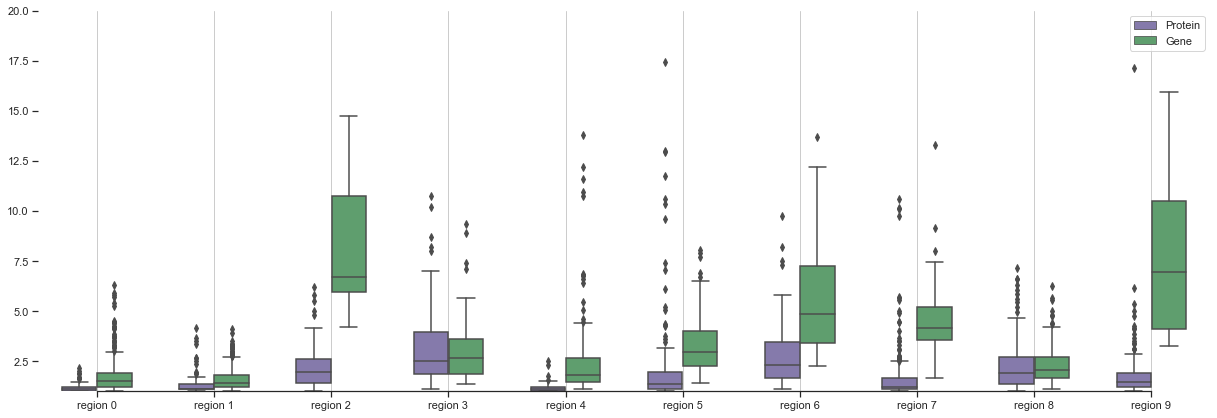

In [30]:
# 0,1,4
# 4,8,5
from scipy.spatial.distance import cdist
from scipy import stats

# 计算每个点与最近的四个点的平均距离
row_ind = [1, 0, 9, 3, 4, 5, 7, 6, 2, 8]
col_ind = [4, 8, 2, 9, 5, 6, 7, 0, 3, 1]

gene_label = {}
for j in range(len(row_ind)):
    points_gene = []
    l = row_ind[j]
    print(l)
    for i in range(len(row)):
        # print(region_gene['x'][i])
        if region_lr_filt['x'].tolist()[i]==l:
            points_gene.append([row[i], col[i]])
    
    d_gene = cdist(points_gene, points_gene)
    sorted_d_gene = np.sort(d_gene, axis=1)
    avg_d_gene = np.mean(sorted_d_gene[:, 1:5], axis=1)
    gene_label[j] = avg_d_gene.tolist()
    
    
protein_label = {}
for j in range(len(col_ind)):
    points_protein = []
    l = col_ind[j]
    for i in range(len(row)):
        if region_protein_filt['x'][i]==l:
            points_protein.append([row[i], col[i]])
    
    d_protein = cdist(points_protein, points_protein)
    sorted_d_protein = np.sort(d_protein, axis=1)
    avg_d_protein = np.mean(sorted_d_protein[:, 1:5], axis=1)
    protein_label[j] = avg_d_protein.tolist()

value = []
pro_count = 0
label = []
for i in range(len(col_ind)):
    value += protein_label[i]
    pro_count += len(protein_label[i])
    label += [f'region {i}']* len(protein_label[i])

gene_count = 0
for i in range(len(row_ind)):
    value += gene_label[i]
    gene_count += len(gene_label[i])
    label += [f'region {i}']*len(gene_label[i])

df_j = {
    'label': label,
    'value': value,
    'modality': ['Protein'] * pro_count + ['Gene'] * gene_count,
}

sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(21, 7))
sns.boxplot(x="label", y="value", data=df_j,
            width=.6, palette=["m", "g"], hue='modality')
# Tweak the visual presentation
ax.set(ylim=(1, 20))
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.savefig(f'../paper/NNfig/Fig5/supp/box_modality_compare.pdf')
plt.show()

In [34]:
from scipy.stats import ranksums
def get_stars(p_value):
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    elif p_value < 0.1:
        return "."
    else:
        return "n.s."

for i in range(10):
    group1 = gene_label[i]
    group2 = protein_label[i]

    # t, p = stats.ttest_ind(group1, group2, equal_var=False)
    t, p = ranksums(group1, group2)
    print("P-value:", p)
    print("star:", get_stars(p))

P-value: 5.473138843799071e-37
star: ***
P-value: 1.0126320070313586e-11
star: ***
P-value: 1.0282663564310045e-12
star: ***
P-value: 0.9218850914466712
star: n.s.
P-value: 2.2236845035474112e-34
star: ***
P-value: 3.021645560771475e-19
star: ***
P-value: 6.213375412122185e-12
star: ***
P-value: 8.752753437068888e-33
star: ***
P-value: 0.001150906143861573
star: **
P-value: 3.5977806270108835e-15
star: ***


# Fig 5b | Gene and protein subpopulations (Enhanced)

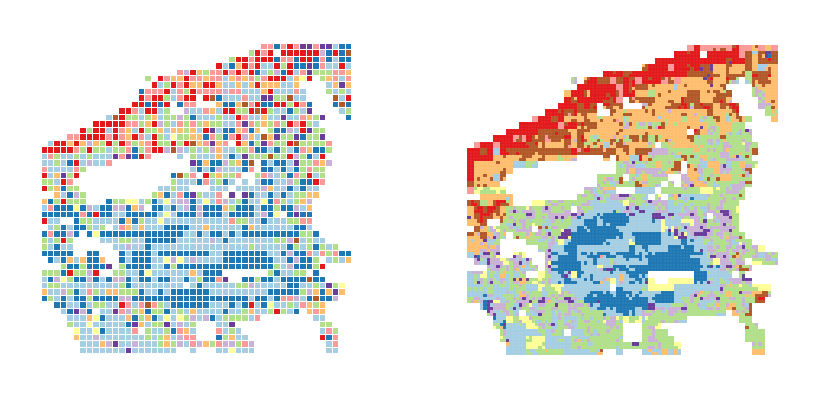

In [9]:
region_hr = pd.read_csv(f'result/{project_name}/{exp_name}_gene_region_label.csv', index_col=0)
en_position = pd.read_csv(f'result/{project_name }/position_enhance_with_center.csv')


label_lr_repeat = np.repeat(region_lr_filt['x'].tolist(), 4)
label_lr_repeat_df = pd.DataFrame(label_lr_repeat)
label_lr_repeat_df.to_csv(f'result/{project_name}/label_lr_repeat.csv')
label_lr_repeat

lr = label_lr_repeat
hr_list = [region_hr.values]

hr = hr_list[0]
lr_class_num = len(np.unique(lr))
hr_class_num = len(np.unique(hr))


class_map = {6:0, 3:0, 
             5:1, 0:2, 11:3, 9:4, 7:4, 
             1:5, 2:6, 10:7, 8:8, 4:9}

row = position['row']
col = position['col']

row_en = en_position['row']/2
col_en = en_position['col']/2

width = 5/2 * np.mean(row)
height = -5/2 * np.mean(col)

size = 20
cmp = 'Paired'
f, ax = plt.subplots(figsize=(12, 6))
plt.axis("equal")

img_00 = plt.scatter(0 * width + row, - col, s=size,
                    marker='s',
                    c=region_lr_filt['x'], cmap=cmp)

img_10 = plt.scatter(1 * width + row_en, - col_en, s=size/4,
                    marker='s',
                    c=map_label(region_hr['x'].tolist(), class_map), cmap=cmp)
mapped_region_hr = map_label(region_hr['x'].tolist(), class_map)
plt.tight_layout()
plt.axis('off')
plt.savefig(f'../paper/NNfig/Fig5/lr_hr_compare.pdf')
plt.savefig(f'../paper/NNfig/Fig5/lr_hr_compare.png')
plt.show()

In [19]:
hist = [0] * 10
for i in region_lr_filt['x']:
    hist[i] += 1
print(hist)

[482, 380, 234, 133, 131, 103, 70, 41, 25, 19]


(10, 16)
(20, 20)


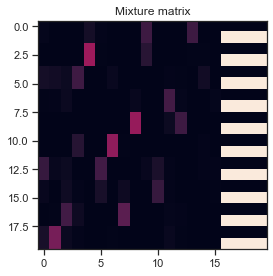

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[13  9  4 17  3 14 15 11  8 12  6 16  5  0 10 18  7  2  1 19]
[0.26960784 0.26504065 0.6437247  1.6437247  0.27609108 0.07908163
 0.0251046  0.28918919 0.61730449 0.26517572 0.59098229 1.6437247
 0.28359317 0.24040277 0.23778502 1.6437247  0.39111111 0.28404344
 0.49506903 1.6437247 ]
11.828205521179614
Label assignment：
lr 0 ->hr 13; lr 0 ->hr 9; lr 1 ->hr 4; lr 2 ->hr 3; lr 2 ->hr 14; lr 3 ->hr 15; lr 3 ->hr 11; lr 4 ->hr 8; lr 4 ->hr 12; lr 5 ->hr 6; lr 6 ->hr 5; lr 6 ->hr 0; lr 7 ->hr 10; lr 8 ->hr 7; lr 8 ->hr 2; lr 9 ->hr 1; 


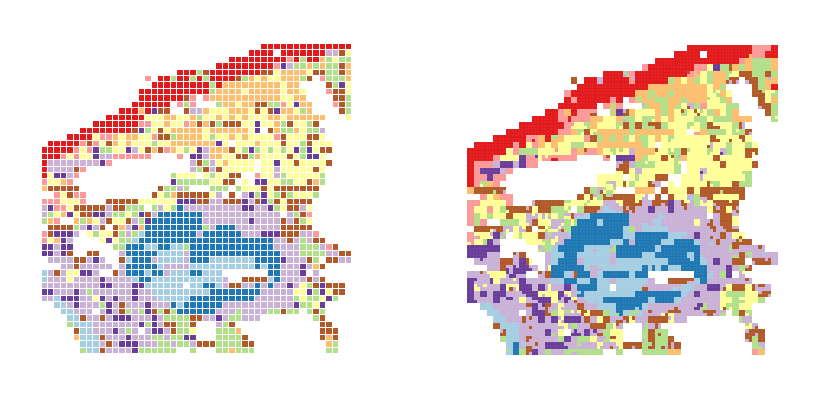

In [10]:
region_protein_lr_repeat =  np.repeat(mapped_protein_lr_label.tolist(), 4)
region_protein_hr = pd.read_csv(f'result/{project_name}/{exp_name}_pro_region_label.csv', index_col=0)

lr = region_protein_lr_repeat

hr = region_protein_hr['x'].values
lr_class_num = len(np.unique(lr))
hr_class_num = len(np.unique(hr))

c_mat = np.zeros((lr_class_num, hr_class_num))
for i in range(lr_class_num):
    for j in range(hr_class_num):
        c_mat[i, j] = jaccard_score(lr==i, hr==j)

c_mat_ = []
for l in c_mat:
    for i in range(2):
        l_ = np.hstack((l,[i*(np.max(c_mat) + 1)]*(2*lr_class_num-hr_class_num)))
        c_mat_.append(l_.tolist())
c_mat_ = np.array(c_mat_)
print(c_mat.shape)
print(c_mat_.shape)

fig, ax = plt.subplots()
im = ax.imshow(c_mat_)

# Show all ticks and label them with the respective list entrie
ax.set_title("Mixture matrix")
fig.tight_layout()
plt.show()

def printf_2(row_ind,col_ind):#输出
    print("Label assignment：")
    for i in range(len(row_ind)):
        if col_ind[i] < 16:
            print("lr",(row_ind[i])//2,"->hr",col_ind[i],end='; ')
    print()

goodAt = c_mat_
weakAt = np.max(c_mat) + 1 -goodAt
row_ind,col_ind=linear_sum_assignment(weakAt)
print(row_ind)
print(col_ind)
print(goodAt[row_ind,col_ind])
print(goodAt[row_ind,col_ind].sum())
printf_2(row_ind,col_ind)

class_map = {}
for i in range(len(row_ind)):
    class_map[col_ind[i]] = row_ind[i]//2
    
def map_label(list_label, class_map=class_map):
    return [class_map[l] for l in list_label]


row = position['row']
col = position['col']

row_en = en_position['row']/2
col_en = en_position['col']/2

width = 5/2 * np.mean(row)
height = -5/2 * np.mean(col)

size = 20
cmp = 'Paired'
f, ax = plt.subplots(figsize=(12, 6))
plt.axis("equal")

img_00 = plt.scatter(0 * width + row, - col, s=size,
                    marker='s',
                    c=mapped_protein_lr_label, cmap=cmp)

img_10 = plt.scatter(1 * width + row_en, - col_en, s=size/4,
                    marker='s',
                    c=map_label(hr.tolist()), cmap=cmp)
mapped_protein_hr = map_label(hr.tolist())
plt.tight_layout()
plt.axis('off')
plt.savefig(f'../paper/NNfig/Fig5/lr_hr_p_compare.pdf')
plt.show()

In [20]:
hist = [0] * 10
for i in mapped_protein_lr_label:
    hist[i] += 1
print(hist)

[100, 165, 186, 53, 145, 140, 308, 111, 208, 202]


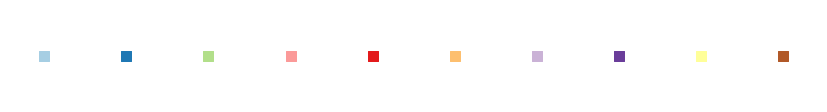

In [11]:
size = 100
cmp = 'Paired'
f, ax = plt.subplots(figsize=(12, 2))
plt.axis("equal")

img_00 = plt.scatter([i for i in range(10)], [1 for i in range(10)], s=size,
                    marker='s',
                    c=[i for i in range(10)], cmap=cmp)
plt.tight_layout()
plt.axis('off')
plt.savefig(f'../paper/NNfig/Fig5/cluster.pdf')
plt.show()

# Fig 5c | Evaluation of spatial compactness of tissue subpopulations identified from gene or protein before or after enhancement.

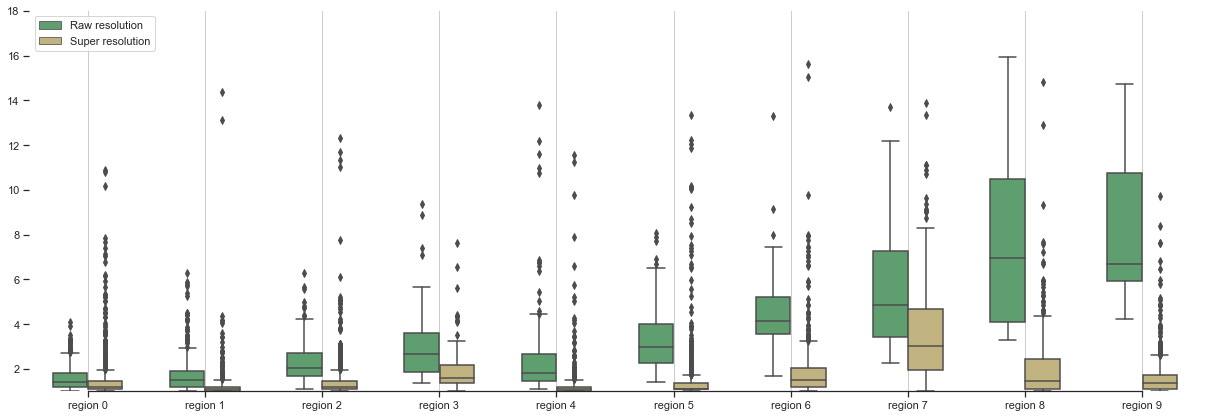

-log P-value: 25.290448836396713
star: ***
-log P-value: 57.48443071542523
star: ***
-log P-value: 80.23675171800035
star: ***
-log P-value: 11.418571204569252
star: ***
-log P-value: 40.8148906035718
star: ***
-log P-value: 49.37200039309207
star: ***
-log P-value: 34.02029004520436
star: ***
-log P-value: 4.963958358375702
star: ***
-log P-value: 12.289704783308707
star: ***
-log P-value: 12.5006098996142
star: ***


In [12]:
# 0,1,4
# 4,8,5
from scipy.spatial.distance import cdist
from scipy import stats

# 计算每个点与最近的四个点的平均距离

lr_label = {}
for j in range(10):
    points_lr = []
    for i in range(len(row)):
        # print(region_gene['x'][i])
        if region_lr_filt['x'].tolist()[i]==j:
            points_lr.append([row[i], col[i]])
    
    d_lr = cdist(points_lr, points_lr)
    sorted_d_lr = np.sort(d_lr, axis=1)
    avg_d_lr = np.mean(sorted_d_lr[:, 1:5], axis=1)
    lr_label[j] = avg_d_lr.tolist()
    
    
hr_label = {}
for j in range(10):
    points_hr = []
    for i in range(len(row_en)):
        if mapped_region_hr[i]==j:
            points_hr.append([row_en[i]*2, col_en[i]*2])
    
    d_hr = cdist(points_hr, points_hr)
    sorted_d_hr = np.sort(d_hr, axis=1)
    avg_d_hr = np.mean(sorted_d_hr[:, 1:5], axis=1)
    hr_label[j] = avg_d_hr.tolist()

value = []

label = []

lr_count = 0
for i in range(10):
    value += lr_label[i]
    lr_count += len(lr_label[i])
    label += [f'region {i}']*len(lr_label[i])

hr_count = 0
for i in range(10):
    value += hr_label[i]
    hr_count += len(hr_label[i])
    label += [f'region {i}']* len(hr_label[i])

df_j = {
    'label': label,
    'value': value,
    'modality': ['Raw resolution'] * lr_count + ['Super resolution'] * hr_count,
}

sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(21, 7))
sns.boxplot(x="label", y="value", data=df_j,
            width=.6, palette=["g", "y"], hue='modality')
# Tweak the visual presentation
ax.set(ylim=(1, 18))
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.savefig(f'../paper/NNfig/Fig5/hr_sr_compare_box.pdf')
plt.show()


def get_stars(p_value):
    if p_value < 0.001:
        return "***"
    elif p_value < 0.01:
        return "**"
    elif p_value < 0.05:
        return "*"
    elif p_value < 0.1:
        return "."
    else:
        return "n.s."

for i in range(10):
    group1 = lr_label[i]
    group2 = hr_label[i]

    t, p = stats.ranksums(group1, group2)

    print("-log P-value:", -np.log10(p))
    print("star:", get_stars(p))

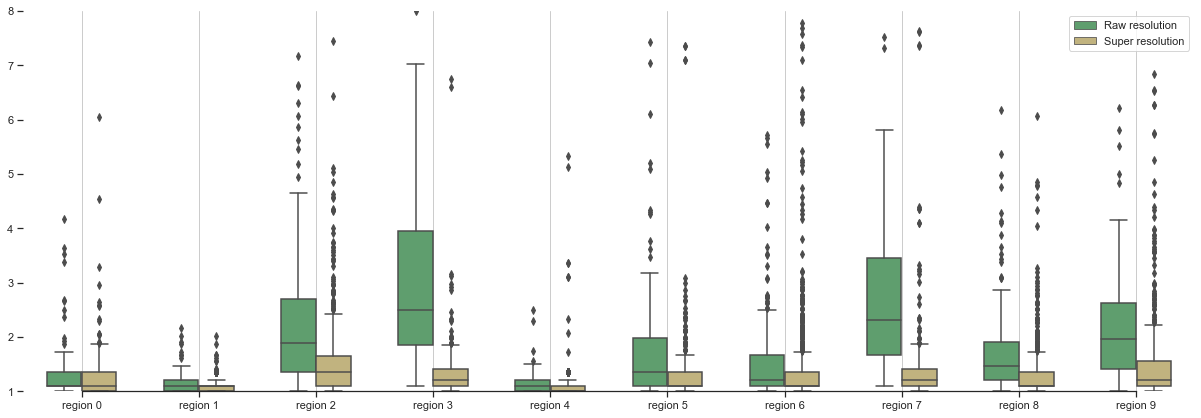

-log P-value: 1.4169768816383297
star: *
-log P-value: 1.7817569357184242
star: *
-log P-value: 17.970953120567824
star: ***
-log P-value: 21.800865072027296
star: ***
-log P-value: 8.276428158813138
star: ***
-log P-value: 7.878726477404429
star: ***
-log P-value: 7.316402931077203
star: ***
-log P-value: 33.51602378724214
star: ***
-log P-value: 33.92438070469427
star: ***
-log P-value: 32.149147453062774
star: ***


In [13]:
from scipy.spatial.distance import cdist
from scipy import stats
# 计算每个点与最近的四个点的平均距离
lr_label = {}
for j in range(10):
    points_lr = []
    for i in range(len(row)):
        # print(region_gene['x'][i])
        if mapped_protein_lr_label[i]==j:
            points_lr.append([row[i], col[i]])
    
    d_lr = cdist(points_lr, points_lr)
    sorted_d_lr = np.sort(d_lr, axis=1)
    avg_d_lr = np.mean(sorted_d_lr[:, 1:5], axis=1)
    lr_label[j] = avg_d_lr.tolist()
    
    
hr_label = {}
for j in range(10):
    points_hr = []
    for i in range(len(row_en)):
        if mapped_protein_hr[i]==j:
            points_hr.append([row_en[i]*2, col_en[i]*2])
    
    d_hr = cdist(points_hr, points_hr)
    sorted_d_hr = np.sort(d_hr, axis=1)
    avg_d_hr = np.mean(sorted_d_hr[:, 1:5], axis=1)
    hr_label[j] = avg_d_hr.tolist()

value = []

label = []

lr_count = 0
for i in range(10):
    value += lr_label[i]
    lr_count += len(lr_label[i])
    label += [f'region {i}']*len(lr_label[i])

hr_count = 0
for i in range(10):
    value += hr_label[i]
    hr_count += len(hr_label[i])
    label += [f'region {i}']* len(hr_label[i])

df_j = {
    'label': label,
    'value': value,
    'modality': ['Raw resolution'] * lr_count + ['Super resolution'] * hr_count,
}

sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(21, 7))
sns.boxplot(x="label", y="value", data=df_j,
            width=.6, palette=["g", "y"], hue='modality')
# Tweak the visual presentation
ax.set(ylim=(1, 8))
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.savefig(f'../paper/NNfig/Fig5/p_hr_sr_compare_box.pdf')
plt.show()


for i in range(10):
    # 两组数据
    group1 = lr_label[i]
    group2 = hr_label[i]

    # 计算 t 值和 P 值
    t, p = stats.ranksums(group1, group2)

    # 输出 P 值
    print("-log P-value:", -np.log10(p))
    print("star:", get_stars(p))

# Fig 5d | Comparison of three tissue regions identified from original or enhanced gene and protein profiles

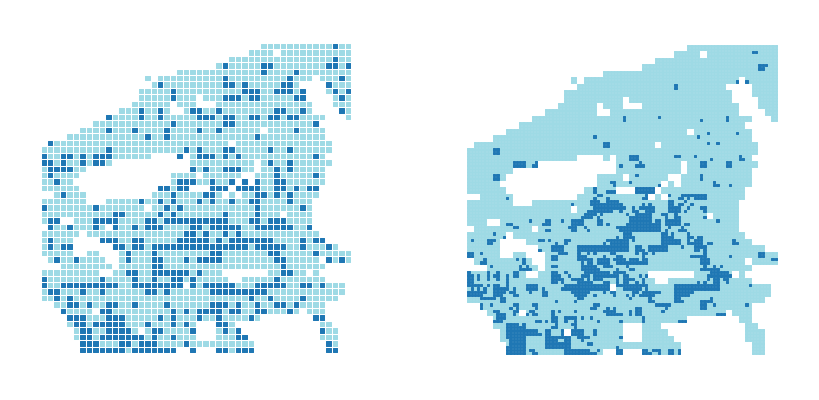

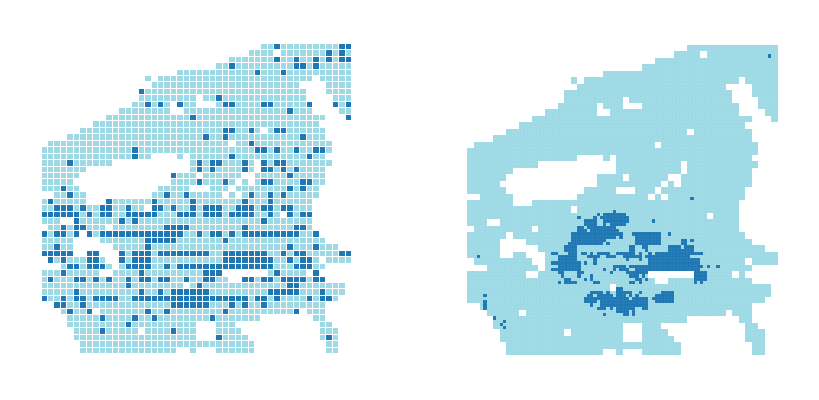

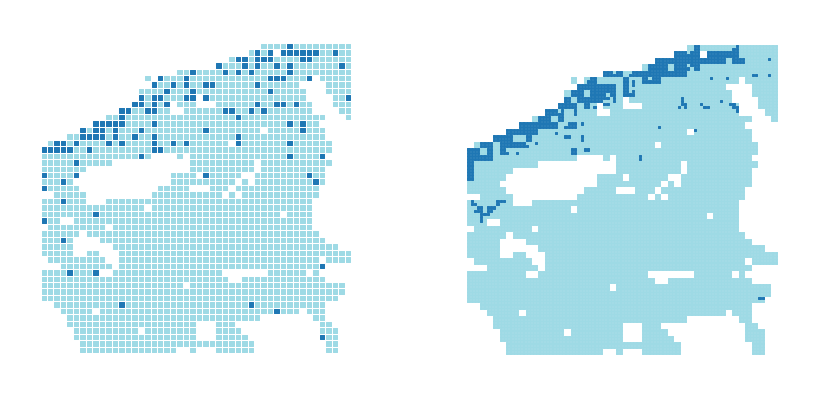

In [48]:
size = 20
cmp = 'tab20_r'
for i in [0,1,4]:
# for i in range(10):
    f, ax = plt.subplots(figsize=(12, 6))
    plt.axis("equal")

    img_00 = plt.scatter(0 * width + row, - col, s=size,
                        marker='s',
                        c=region_lr_filt['x']==i, cmap=cmp)

    img_10 = plt.scatter(1 * width + row_en, - col_en, s=size/4,
                        marker='s',
                        c=np.array(mapped_region_hr)==i, cmap=cmp)
    plt.tight_layout()
    plt.axis('off')
    plt.savefig(f'../paper/NNfig/Fig5/g_compare_region_{i+1}.pdf')
    plt.show()

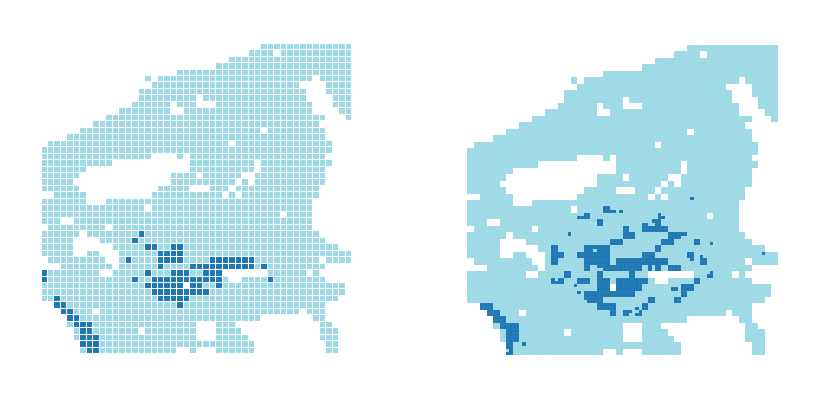

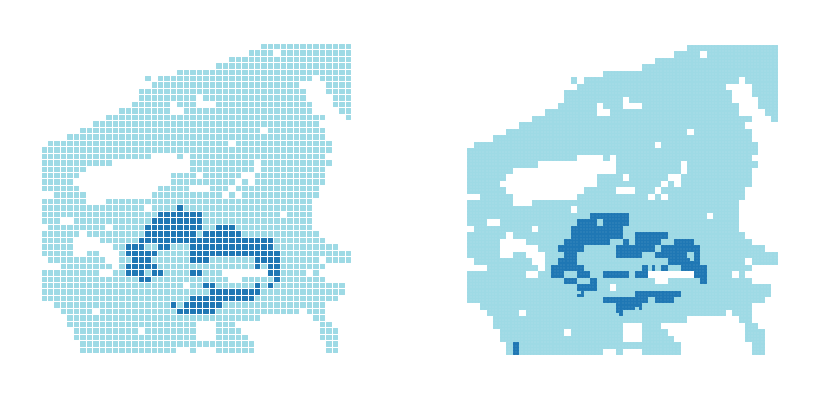

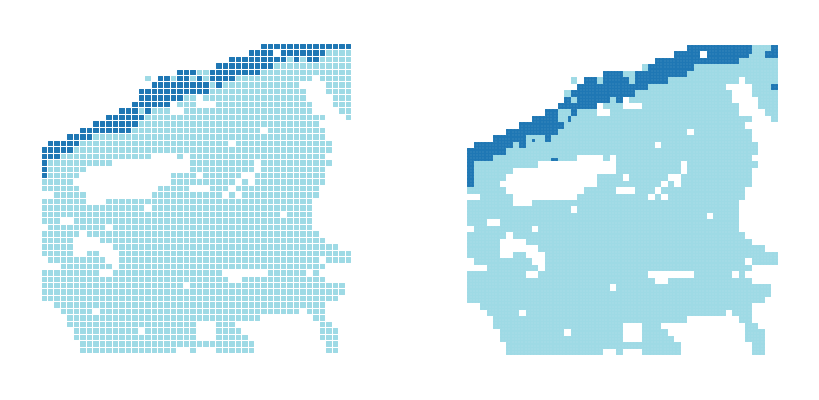

In [49]:
size = 20
cmp = 'tab20_r'
for i in [0,1,4]:
    f, ax = plt.subplots(figsize=(12, 6))
    plt.axis("equal")
    img_00 = plt.scatter(0 * width + row, - col, s=size,
                        marker='s',
                        c=mapped_protein_lr_label==i, cmap=cmp)

    img_10 = plt.scatter(1 * width + row_en, - col_en, s=size/4,
                        marker='s',
                        c=np.array(mapped_protein_hr)==i, cmap=cmp)
    plt.tight_layout()
    plt.axis('off')
    plt.savefig(f'../paper/NNfig/Fig5/p_compare_region_{i+1}.pdf')
    plt.show()

# Fig 5e | Spatial visualization of differentially expressed genes and proteins

In [16]:
sct_lr_gene = pd.read_csv(f'result/{project_name}/reordered_filt_SCT_0.75.csv', index_col=0)
sct_lr_protein = pd.read_csv(f'result/{project_name}/reordered_filt_protein_SCT.csv', index_col=0)
sct_hr_gene = pd.read_csv(f'result/{project_name}/{exp_name}_gene_sct.csv', index_col=0).T
sct_hr_protein = pd.read_csv(f'result/{project_name}/{exp_name}_protein_sct.csv', index_col=0).T

In [17]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, fowlkes_mallows_score
from sklearn.metrics import normalized_mutual_info_score as nmi
from scipy.stats import wasserstein_distance as WD
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sct_lr_gene = pd.read_csv(f'result/{project_name}/reordered_filt_SCT_0.75.csv', index_col=0)
sct_lr_protein = pd.read_csv(f'result/{project_name}/reordered_filt_protein_SCT.csv', index_col=0)
sct_hr_gene = pd.read_csv(f'result/{project_name}/{exp_name}_gene_sct.csv', index_col=0).T
sct_hr_protein = pd.read_csv(f'result/{project_name}/{exp_name}_protein_sct.csv', index_col=0).T
print(exp_name)
# sct_hr_gene = pd.read_csv(f'result/{project_name}/{exp_name}_gene.csv', index_col=0)
# sct_hr_protein = pd.read_csv(f'result/{project_name}/{exp_name}_protein.csv', index_col=0)

svae_skin_nn25


FADS1


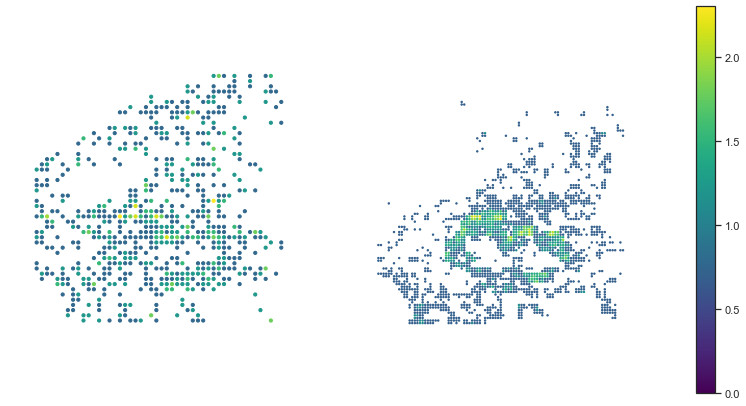

RNA18S5


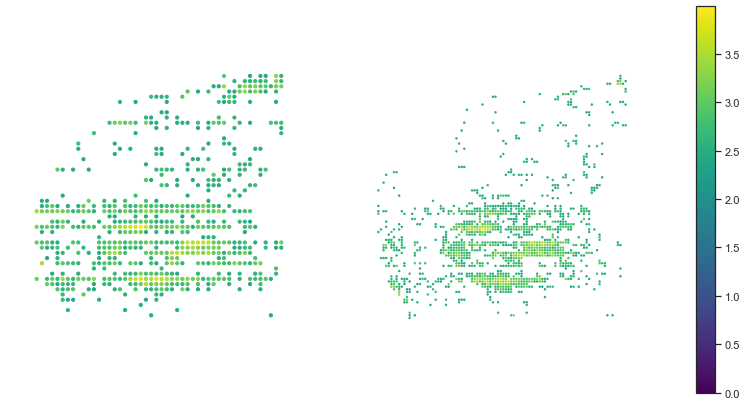

TMEM132D


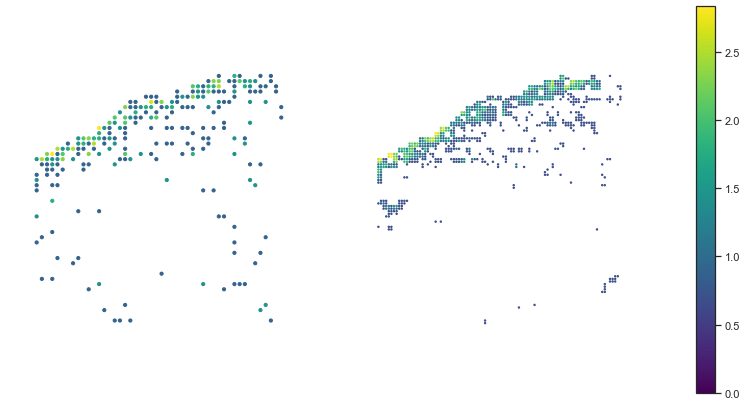

In [18]:
def min_max_norm(array):
    return (array - np.min(array))/(np.max(array) - np.min(array))


def min_max_norm_t(array, t=0):
    norm_array = min_max_norm(array)
    return ((norm_array - t) + np.abs((norm_array - t)))/2

def step_norm_t(array, t=0):
    norm_array = min_max_norm(array)
    return np.array([int(l > t) for l in norm_array])

position = pd.read_csv(f'result/{project_name }/position_with_center.csv')
en_position = pd.read_csv(f'result/{project_name }/position_enhance_with_center.csv')

# 'RPS17L'
gene_roi = ['FADS1', 'RNA18S5', 'TMEM132D']
row = position['row']
col = position['col']

row_en = en_position['row']/2
col_en = en_position['col']/2

width = 5/2 * np.mean(row)

size = 10
# t_ = [0.001, 0.6, 0.1]
t_ = [0.1, 0.6, 0]
for i in range(len(gene_roi)):
    g = gene_roi[i]
    t = t_[i]
    # f_, ax_ = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
    f_, ax_ = plt.subplots(figsize=(12, 6))
    plt.axis("equal")
    print(g)
    img_00 = plt.scatter(0 * width + row, - col, s=size *  step_norm_t(sct_lr_gene[g], t),
                        marker='o',
                        c=sct_lr_gene[g], cmap='viridis', vmin=0, vmax=np.max(sct_lr_gene[g]))

    img_10 = plt.scatter(1 * width + row_en, - col_en, s=size/5 *  step_norm_t(sct_hr_gene[g], t),
                        marker='o',
                        c=sct_hr_gene[g], cmap='viridis', vmin=0, vmax=np.max(sct_hr_gene[g]))
    
#     img_00 = plt.scatter(0 * width + row, - col, s=size *  step_norm_t(sct_lr_gene[g], t),
#                     marker='o',
#                     c=sct_lr_gene[g], cmap='viridis')

#     img_10 = plt.scatter(1 * width + row_en, - col_en, s=size/5 *  step_norm_t(sct_hr_gene[g], t),
#                         marker='o',
#                         c=sct_hr_gene[g], cmap='viridis')
    
    f_.colorbar(img_10)
    plt.tight_layout()
    plt.axis('off') 
    plt.savefig(f'../paper/NNfig/Fig5/{g}.pdf')
    plt.show()

CD71.CCGTGTTCCTCATTA


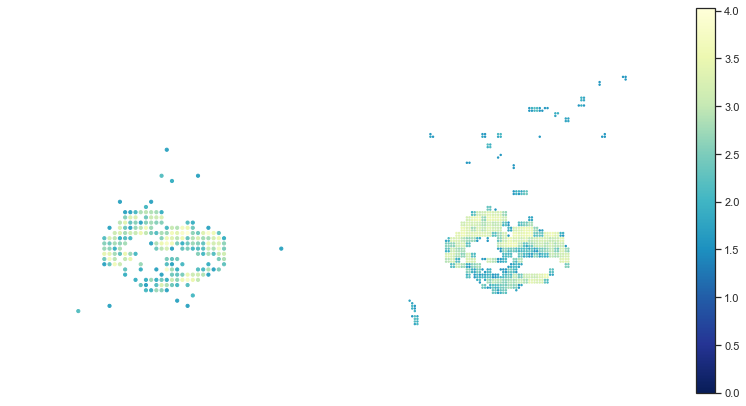

CD107a..LAMP.1..CAGCCCACTGCAATA


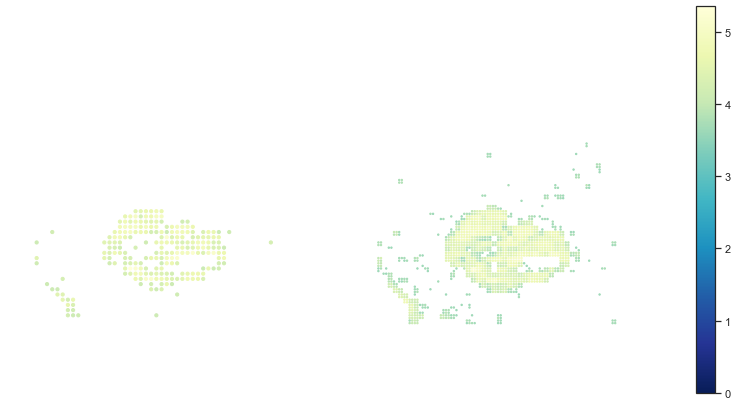

IgM.TAGCGAGCCCGTATA


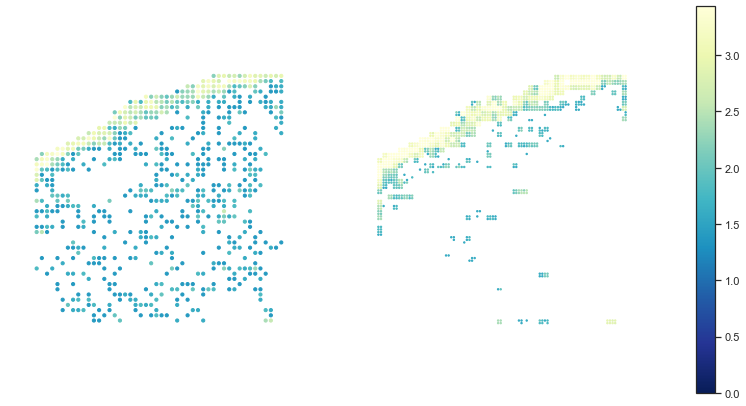

In [19]:
protein_roi = ['CD71.CCGTGTTCCTCATTA','CD107a..LAMP.1..CAGCCCACTGCAATA',
            'IgM.TAGCGAGCCCGTATA', ]

size = 10
t_ = [0.4, 0.7, 0.4]

cmap = 'YlGnBu_r'
for i in range(len(protein_roi)):
    p = protein_roi[i]
    t = t_[i]
    f_, ax_ = plt.subplots(figsize=(12, 6))
    plt.axis("equal")
    print(p)
    p_ = p.replace('_', '-')
    
    img_00 = plt.scatter(0 * width + row, - col, s=size *  step_norm_t(sct_lr_protein[p], t),
                        marker='o',
                        c=sct_lr_protein[p], cmap=cmap, vmin=0, vmax=np.max(sct_lr_protein[p]))

    img_10 = plt.scatter(1 * width + row_en, - col_en, s=size/5 *  step_norm_t(sct_hr_protein[p_], t),
                        marker='o',
                        c=sct_hr_protein[p_], cmap=cmap, vmin=0, vmax=np.max(sct_lr_protein[p]))
    f_.colorbar(img_10)
    plt.tight_layout()
    plt.axis('off')
    plt.savefig(f'../paper/NNfig/Fig5/{p}.pdf')
    plt.show()

In [20]:
for i in range(3):
    g = gene_roi[i]
    p = protein_roi[i]
    x = sct_lr_gene[g].values
    y = sct_lr_protein[p].values
    print(pearsonr(x, y)[0])


0.2654544457334628
0.25405524529096285
0.47125416015492505


In [21]:
for i in range(3):
    g = gene_roi[i]
    p = protein_roi[i]
    x = sct_hr_gene[g].values
    y = sct_hr_protein[p].values
    print(pearsonr(x, y)[0])

0.6221501686794076
0.36380147605777396
0.6083050907212341


# Supp Fig 9b (top) | Comparison of tissue region identifications from gene profiles before and after enhancement

(10, 22)
(30, 30)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
[ 0  3 23  2 10  9  1 19 27  5  8 29 15  4 24  6 11 12  7 17 26 20 21 28
 16 13 25 18 14 22]
Label assignment：
lr 0 ->hr 0; lr 1 ->hr 3; lr 2 ->hr 23; lr 3 ->hr 2; lr 4 ->hr 10; lr 5 ->hr 9; lr 6 ->hr 1; lr 7 ->hr 19; lr 8 ->hr 27; lr 9 ->hr 5; lr 10 ->hr 8; lr 11 ->hr 29; lr 12 ->hr 15; lr 13 ->hr 4; lr 14 ->hr 24; lr 15 ->hr 6; lr 16 ->hr 11; lr 17 ->hr 12; lr 18 ->hr 7; lr 19 ->hr 17; lr 20 ->hr 26; lr 21 ->hr 20; lr 22 ->hr 21; lr 23 ->hr 28; lr 24 ->hr 16; lr 25 ->hr 13; lr 26 ->hr 25; lr 27 ->hr 18; lr 28 ->hr 14; lr 29 ->hr 22; {0: 0, 3: 0, 23: 0, 2: 1, 10: 1, 9: 1, 1: 2, 19: 2, 27: 2, 5: 3, 8: 3, 29: 3, 15: 4, 4: 4, 24: 4, 6: 5, 11: 5, 12: 5, 7: 6, 17: 6, 26: 6, 20: 7, 21: 7, 28: 7, 16: 8, 13: 8, 25: 8, 18: 9, 14: 9, 22: 9}
(10, 16)
(20, 20)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 1  6  3  2  0 18  9 11  4 19 10  5  7 16 14 13 12 17 15  8]
Label

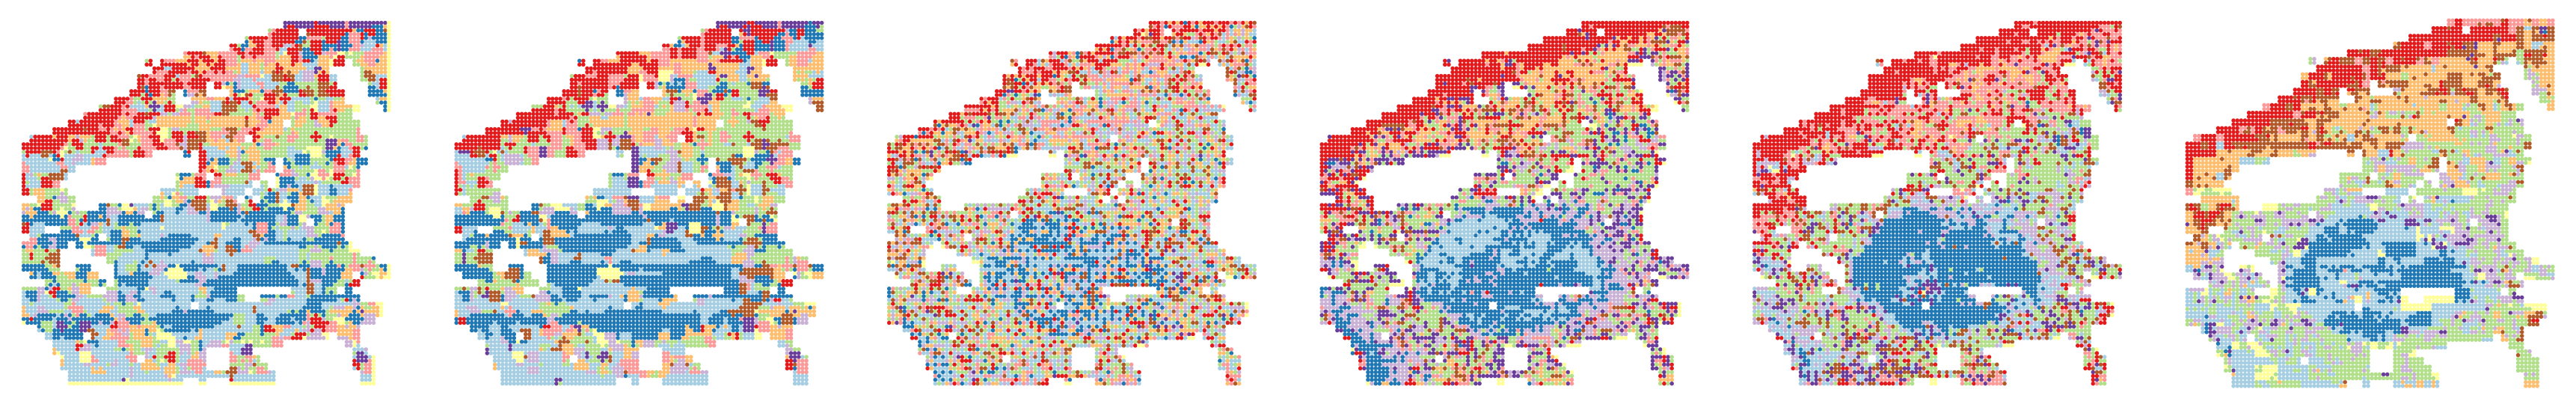

In [16]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, mean_absolute_error, fowlkes_mallows_score
from sklearn.metrics import normalized_mutual_info_score as nmi
from scipy.stats import wasserstein_distance as WD
from scipy.stats import pearsonr, spearmanr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

exp_name = 'svae_skin_nn25'

project_name = 'SpatialCITE_skin_sr/joint'
region_gene = pd.read_csv(f'result/{project_name}/region_filt_label_0.75.csv', index_col=0)
region_protein = pd.read_csv(f'result/{project_name}/region_label_protein.csv', index_col=0)
region_protein_hr = pd.read_csv(f'result/{project_name}/{exp_name}_pro_region_label.csv', index_col=0)

position = pd.read_csv(f'result/{project_name }/position_with_center.csv')
region_protein_filt = region_protein.loc[position['barcode']]

region_lr = pd.read_csv(f'result/{project_name}/region_filt_label_0.75.csv', index_col=0)
position = pd.read_csv(f'result/{project_name }/position_with_center.csv')

region_hr = pd.read_csv(f'result/{project_name}/{exp_name}_gene_region_label.csv', index_col=0)

region_spatial_1 = pd.read_csv(f'result/{project_name}/interpolation_linear_gene_region_label.csv', index_col=0)

region_cross_1 = pd.read_csv(f'result/{project_name}/g2p_linear_gene_region_label.csv', index_col=0)
region_cross_2 = pd.read_csv(f'result/{project_name}/g2p_gp_gene_region_label.csv', index_col=0)
region_cross_3 = pd.read_csv(f'result/{project_name}/g2p_ml_gene_region_label_2.csv', index_col=0)

en_position = pd.read_csv(f'result/{project_name }/position_enhance_with_center.csv')

region_spatial_3 = pd.read_csv(f'result/{project_name}/gp3_gene_region_label.csv', index_col=0)
region_lr_filt = region_lr.loc[position['barcode']]


from sklearn.metrics import adjusted_rand_score as ari
from scipy.optimize import linear_sum_assignment

label_lr_repeat = np.repeat(region_lr_filt['x'].tolist(), 4)
label_lr_repeat_df = pd.DataFrame(label_lr_repeat)
label_lr_repeat_df.to_csv(f'result/{project_name }/label_lr_repeat.csv')
label_lr_repeat

lr = label_lr_repeat
hr_list = [region_hr.values,
           region_spatial_1.values,
           region_spatial_3.values,
           region_cross_1.values,
           region_cross_2.values,
           region_cross_3.values,]

class_map = {6:0, 3:0, 
             5:1, 0:2, 11:3, 9:4, 7:4, 
             1:5, 2:6, 10:7, 8:8, 4:9}
def map_label(list_label, class_map=class_map):
    return np.array([class_map[l] for l in list_label])
mapped_region_hr = map_label(region_hr['x'].tolist())

from sklearn.metrics import adjusted_rand_score as ari
from scipy.optimize import linear_sum_assignment

label_lr_repeat = np.repeat(region_lr_filt['x'].tolist(), 4)
label_lr_repeat_df = pd.DataFrame(label_lr_repeat)
label_lr_repeat_df.to_csv(f'result/{project_name }/label_lr_repeat.csv')
label_lr_repeat

lr = label_lr_repeat
hr_list = [region_spatial_1.values.T,
           region_spatial_3.values.T,
           region_cross_1.values.T,
           region_cross_2.values.T,
           region_cross_3.values.T,
           region_hr.values.T,]


mapped_region_hr_dic = {}
f, axs = plt.subplots(nrows=1, ncols=6, figsize=(48, 8))
for kk in range(len(hr_list)):
    
    hr = hr_list[kk][0]
    lr_class_num = len(np.unique(lr))
    hr_class_num = len(np.unique(hr))

    c_mat = np.zeros((lr_class_num, hr_class_num))
    for i in range(lr_class_num):
        for j in range(hr_class_num):
            c_mat[i, j] = ari(lr==i, (hr==j).reshape(-1))

    c_mat_ = []
    num = int(np.ceil(hr_class_num/lr_class_num))
    if num <= 1:
        c_mat_ = c_mat.copy()
    else:
        for l in c_mat:
            for i in range(num):
                l_ = np.hstack((l,[i*(np.max(c_mat) + 1)]*(num*lr_class_num-hr_class_num)))
                c_mat_.append(l_.tolist())
        c_mat_ = np.array(c_mat_)
    print(c_mat.shape)
    print(c_mat_.shape)

    def printf_2(row_ind,col_ind):#输出
        print("Label assignment：")
        for i in range(len(row_ind)):
            print("lr",(row_ind[i]),"->hr",col_ind[i],end='; ')

    goodAt = c_mat_
    weakAt = np.max(c_mat) + 1 -goodAt
    row_ind,col_ind=linear_sum_assignment(weakAt)
    print(row_ind)
    print(col_ind)
    printf_2(row_ind,col_ind)

    class_map = {}
    for i in range(len(row_ind)):
        class_map[col_ind[i]] = row_ind[i]//num
        
    def map_label(list_label, class_map=class_map):
        return [class_map[l] for l in list_label]

    print(class_map)
    row = position['row']
    col = position['col']

    row_en = en_position['row']/2
    col_en = en_position['col']/2
    
    size = 120
    cmp = 'Paired'
    
    plt.axis("equal")
    axs[kk].scatter(row_en, - col_en, s=size/4,
                        marker='o',
                        c=map_label(hr.tolist()), cmap=cmp, linewidths=0)
    mapped_region_hr_dic[kk] = map_label(hr.tolist())
    plt.tight_layout()
    axs[kk].axis('off')
plt.savefig(f'../paper/NNfig/Fig5/supp/g_cluster_compare.png')

# Supp FIg 9c (left) | Spatial compactness evaluation based on regions identified from enhanced gene

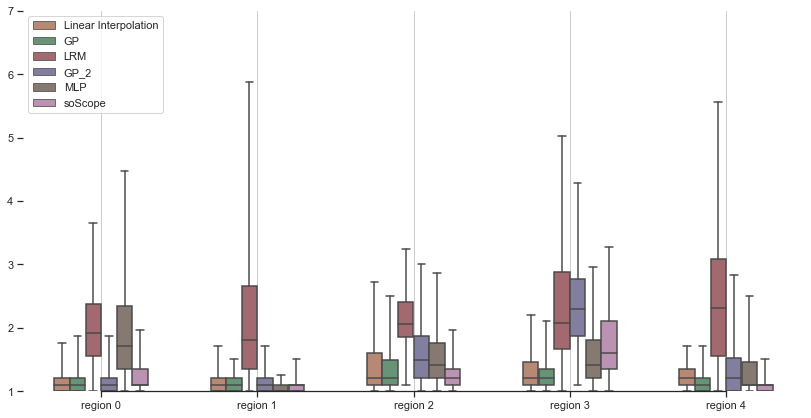

In [46]:
from scipy.spatial.distance import cdist

def remove_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return [x for x in data if lower_bound <= x <= upper_bound]


value = []
label = []
modality_ = ['Linear Interpolation', 'GP', 'LRM', 'GP_2', 'MLP', 'soScope',]
mod = []
# roi_region = [2, 4, 5]
roi_region = [i for i in range(5)]


color_list = [[194, 131, 105],
             [96, 154, 116], [171, 96, 103],
             [126, 120, 164], [138, 120, 109],
             [194, 139, 182]]
color_x = [f'#{hex(i[0])[2:]}{hex(i[1])[2:]}{hex(i[2])[2:]}' for i in color_list]

hr_label = {}
for kk in range(6):
    hr_label[kk] = {}
    mapped_region_hr = mapped_region_hr_dic[kk]
    for j in roi_region:
        points_hr = []
        for i in range(len(row_en)):
            if mapped_region_hr[i]==j:
                points_hr.append([row_en[i]*2, col_en[i]*2])

        d_hr = cdist(points_hr, points_hr)
        sorted_d_hr = np.sort(d_hr, axis=1)
        avg_d_hr = np.mean(sorted_d_hr[:, 1:5], axis=1)
        hr_label[kk][j] = remove_outliers(avg_d_hr.tolist())

    hr_count = 0
    for i in roi_region:
        value += hr_label[kk][i]
        hr_count += len(hr_label[kk][i])
        label += [f'region {i}']* len(hr_label[kk][i])
    mod += [modality_[kk]] * hr_count

df_j = {
    'label': label,
    'value': value,
    'modality': mod,
}
sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x="label", y="value", data=df_j,whis=[0, 100],
            palette=color_x, width=.6, hue='modality', hue_order=['Linear Interpolation', 'GP', 'LRM', 'GP_2', 'MLP', 'soScope'])
# Tweak the visual presentation
ax.set(ylim=(1, 7))
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.savefig(f'../paper/NNfig/Fig5/supp/gene_distance_compare.pdf')
plt.show()

# Supp Fig 9b (down) | Comparison of tissue region identifications from protein profiles before and after enhancement

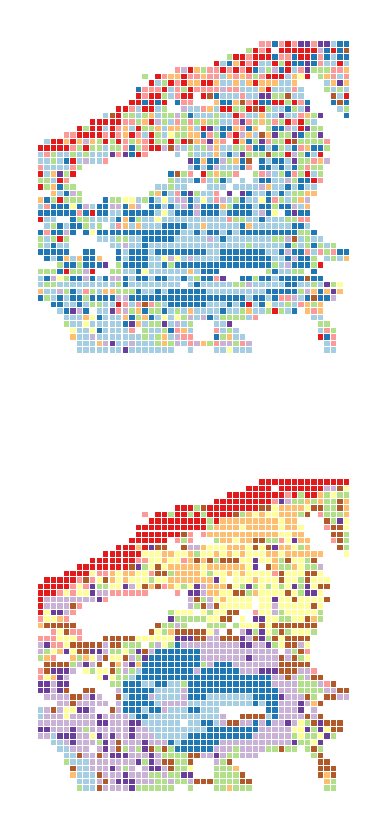

(10, 15)
(20, 20)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 6 15  2 16 13  3 11 18  7  9  5 19  1 14  4  8 12 17  0 10]
Label assignment：
lr 0 ->hr 6; lr 1 ->hr 15; lr 2 ->hr 2; lr 3 ->hr 16; lr 4 ->hr 13; lr 5 ->hr 3; lr 6 ->hr 11; lr 7 ->hr 18; lr 8 ->hr 7; lr 9 ->hr 9; lr 10 ->hr 5; lr 11 ->hr 19; lr 12 ->hr 1; lr 13 ->hr 14; lr 14 ->hr 4; lr 15 ->hr 8; lr 16 ->hr 12; lr 17 ->hr 17; lr 18 ->hr 0; lr 19 ->hr 10; {6: 0, 15: 0, 2: 1, 16: 1, 13: 2, 3: 2, 11: 3, 18: 3, 7: 4, 9: 4, 5: 5, 19: 5, 1: 6, 14: 6, 4: 7, 8: 7, 12: 8, 17: 8, 0: 9, 10: 9}
(10, 14)
(20, 20)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 7 14  8  5  2 16 10 17  4 18  6 11 13  0  9 15  1 19  3 12]
Label assignment：
lr 0 ->hr 7; lr 1 ->hr 14; lr 2 ->hr 8; lr 3 ->hr 5; lr 4 ->hr 2; lr 5 ->hr 16; lr 6 ->hr 10; lr 7 ->hr 17; lr 8 ->hr 4; lr 9 ->hr 18; lr 10 ->hr 6; lr 11 ->hr 11; lr 12 ->hr 13; lr 13 ->hr 0; lr 14 ->hr 9; lr 15 ->hr 15; lr 16 ->hr 1; lr 17 ->hr 19; lr 18 ->hr 3; lr 1

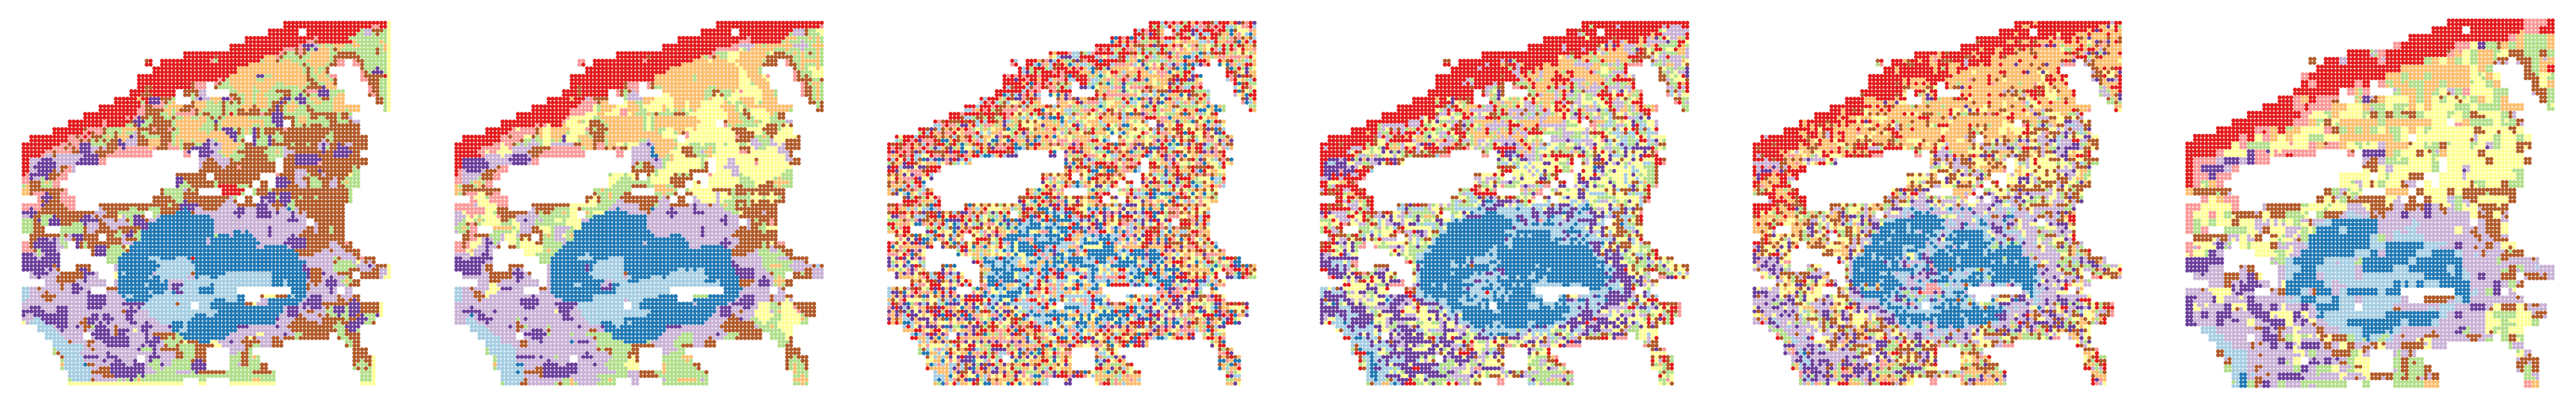

In [22]:
region_gene = pd.read_csv(f'result/{project_name}/region_filt_label_0.75.csv', index_col=0)
region_protein = pd.read_csv(f'result/{project_name}/region_label_protein.csv', index_col=0)

position = pd.read_csv(f'result/{project_name }/position_with_center.csv')
region_protein_filt = region_protein.loc[position['barcode']]

region_hr =   pd.read_csv(f'result/{project_name}/{exp_name}_pro_region_label.csv', index_col=0)

region_spatial_1 = pd.read_csv(f'result/{project_name}/interpolation_linear_pro_region_label.csv', index_col=0)
region_spatial_3 = pd.read_csv(f'result/{project_name}/gp3_pro_region_label.csv', index_col=0)
region_cross_1 = pd.read_csv(f'result/{project_name}/g2p_linear_pro_region_label.csv', index_col=0)
region_cross_2 = pd.read_csv(f'result/{project_name}/g2p_gp_pro_region_label.csv', index_col=0)
region_cross_3 = pd.read_csv(f'result/{project_name}/g2p_ml_pro_region_label_2.csv', index_col=0)

en_position = pd.read_csv(f'result/{project_name }/position_enhance_with_center.csv')

gene_label = region_gene.values
protein_label = region_protein_filt.values

class_map = {4:1, 8:0, 2:9, 9:3, 5:4, 6:5, 7:7, 0:6, 3:2, 1:8}

def map_label(list_label, class_map=class_map):
    return np.array([class_map[l] for l in list_label])
    
row = position['row']
col = position['col']

row_en = en_position['row']/2
col_en = en_position['col']/2

width = 5/2 * np.mean(row)
height = -5/2 * np.mean(col)



size = 20
cmp = 'Paired'
f, ax = plt.subplots(figsize=(6, 12))
plt.axis("equal")

img_00 = plt.scatter(0 * width + row, - col, s=size,
                    marker='s',
                    c=region_lr_filt['x'], cmap=cmp)

img_10 = plt.scatter(row, height - col, s=size,
                    marker='s',
                    c=map_label(region_protein_filt['x'].tolist()), cmap=cmp)
mapped_protein_lr_label = map_label(region_protein_filt['x'].tolist())
plt.tight_layout()
plt.axis('off')
plt.show()

from sklearn.metrics import adjusted_rand_score as ari
from scipy.optimize import linear_sum_assignment

label_lr_repeat = np.repeat(mapped_protein_lr_label.tolist(), 4)
label_lr_repeat_df = pd.DataFrame(label_lr_repeat)
label_lr_repeat_df.to_csv(f'result/{project_name }/label_lr_repeat.csv')

hr_list = [region_spatial_1.values.T,
           region_spatial_3.values.T,
           region_cross_1.values.T,
           region_cross_2.values.T,
           region_cross_3.values.T, 
           region_hr.values.T,]
lr = label_lr_repeat
f, axs = plt.subplots(nrows=1, ncols=6, figsize=(48, 8))
mapped_region_hr_p_dic = {}
for kk in range(len(hr_list)):
    
    hr = hr_list[kk][0]
    lr_class_num = len(np.unique(lr))
    hr_class_num = len(np.unique(hr))

    c_mat = np.zeros((lr_class_num, hr_class_num))
    for i in range(lr_class_num):
        for j in range(hr_class_num):
            c_mat[i, j] = ari(lr==i, (hr==j).reshape(-1))

    c_mat_ = []
    num = int(np.ceil(hr_class_num/lr_class_num))
    if num <= 1:
        c_mat_ = c_mat.copy()
    else:
        for l in c_mat:
            for i in range(num):
                l_ = np.hstack((l,[i*(np.max(c_mat) + 1)]*(num*lr_class_num-hr_class_num)))
                c_mat_.append(l_.tolist())
        c_mat_ = np.array(c_mat_)
    print(c_mat.shape)
    print(c_mat_.shape)

    def printf_2(row_ind,col_ind):#输出
        print("Label assignment：")
        for i in range(len(row_ind)):
            print("lr",(row_ind[i]),"->hr",col_ind[i],end='; ')

    goodAt = c_mat_
    weakAt = np.max(c_mat) + 1 -goodAt
    row_ind,col_ind=linear_sum_assignment(weakAt)
    print(row_ind)
    print(col_ind)
    printf_2(row_ind,col_ind)

    class_map = {}
    for i in range(len(row_ind)):
        class_map[col_ind[i]] = row_ind[i]//num
        
    def map_label(list_label, class_map=class_map):
        return [class_map[l] for l in list_label]

    print(class_map)
    row = position['row']
    col = position['col']

    row_en = en_position['row']/2
    col_en = en_position['col']/2

    width = 5/2 * np.mean(row)
    height = -5/2 * np.mean(col)
    
    size = 120
    cmp = 'Paired'
    
    plt.axis("equal")
    axs[kk].scatter(row_en, - col_en, s=size/4,
                        marker='o',
                        c=map_label(hr.tolist()), cmap=cmp, linewidths=0)
    mapped_region_hr_p_dic[kk] = map_label(hr.tolist())
    plt.tight_layout()
    axs[kk].axis('off')
plt.savefig(f'../paper/NNfig/Fig5/supp/p_cluster_compare.png')
plt.show()

# Supp FIg 9c (right) | Spatial compactness evaluation based on regions identified from enhanced protein

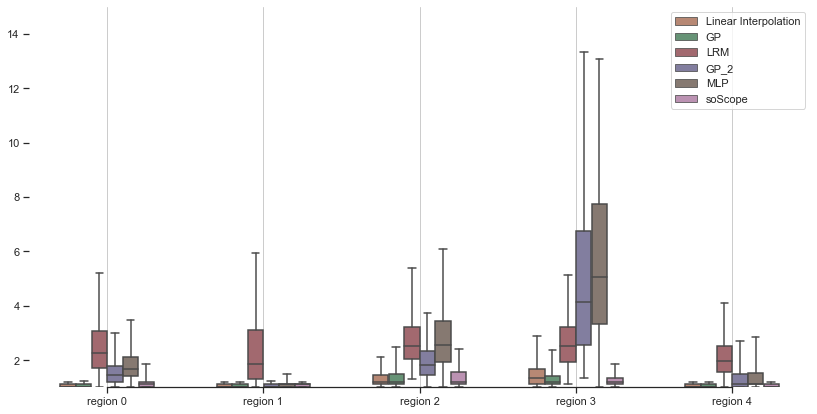

In [45]:
value = []
label = []
mod = []
roi_region = [i for i in range(5)]

color_list = [[194, 131, 105],
             [96, 154, 116], [171, 96, 103],
             [126, 120, 164], [138, 120, 109],
             [194, 139, 182]]
color_x = [f'#{hex(i[0])[2:]}{hex(i[1])[2:]}{hex(i[2])[2:]}' for i in color_list]

hr_label_p = {}
for kk in range(6):
    hr_label_p[kk] = {}
    mapped_region_hr = mapped_region_hr_p_dic[kk]
    for j in roi_region:
        points_hr = []
        for i in range(len(row_en)):
            if mapped_region_hr[i]==j:
                points_hr.append([row_en[i]*2, col_en[i]*2])

        d_hr = cdist(points_hr, points_hr)
        sorted_d_hr = np.sort(d_hr, axis=1)
        avg_d_hr = np.mean(sorted_d_hr[:, 1:5], axis=1)
        hr_label_p[kk][j] = remove_outliers(avg_d_hr.tolist())

    hr_count = 0
    for i in roi_region:
        value += hr_label_p[kk][i]
        hr_count += len(hr_label_p[kk][i])
        label += [f'region {i}']* len(hr_label_p[kk][i])
    mod += [modality_[kk]] * hr_count
    
df_j = {
    'label': label,
    'value': value,
    'modality': mod,
}
sns.set_theme(style="ticks")
# Initialize the figure with a logarithmic x axis
f, ax = plt.subplots(figsize=(14, 7))
sns.boxplot(x="label", y="value", data=df_j,whis=[0, 100],
            width=.6, hue='modality', hue_order=['Linear Interpolation', 'GP', 'LRM', 'GP_2', 'MLP', 'soScope'],
           palette=color_x)
# Tweak the visual presentation
ax.set(ylim=(1, 15))
ax.xaxis.grid(True)
sns.despine(trim=True, left=True)
plt.savefig('../paper/NNfig/Fig5/supp/protein_distance_compare.pdf')
plt.show()

# Supp Fig 10

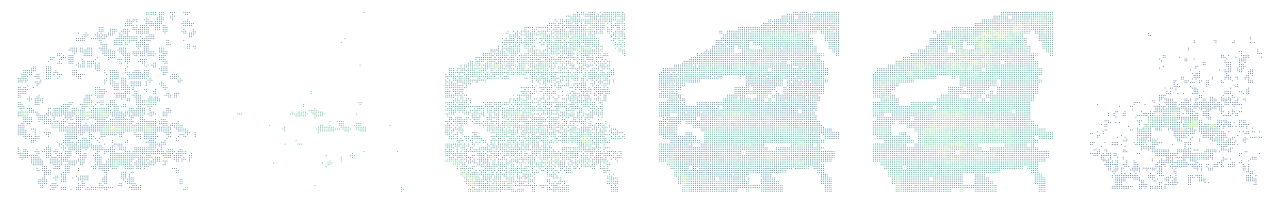

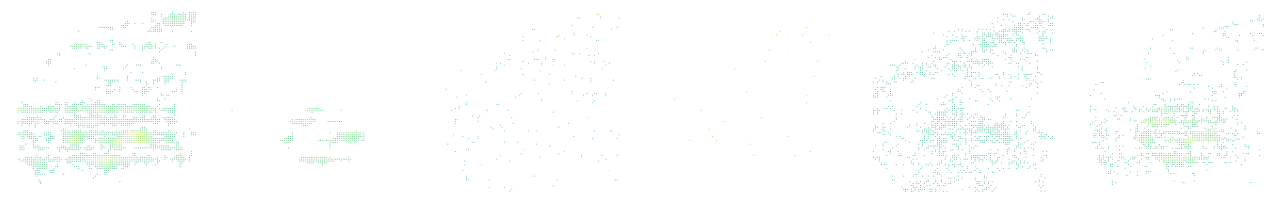

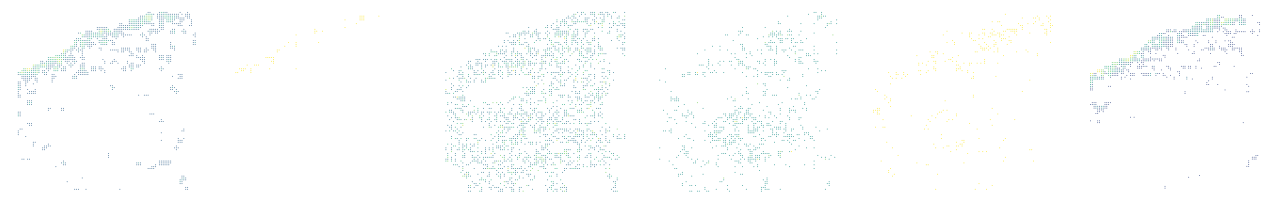

In [26]:
import numpy as np
import pandas as pd
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib

sct_lr_gene = pd.read_csv(f'result/{project_name}/reordered_filt_SCT_0.75.csv', index_col=0)
sct_lr_protein = pd.read_csv(f'result/{project_name}/reordered_filt_protein_SCT.csv', index_col=0)

sct_hr_gene_1 = pd.read_csv(f'result/{project_name}/{exp_name}_gene_sct.csv', index_col=0).T
sct_hr_protein_1 = pd.read_csv(f'result/{project_name}/{exp_name}_protein_sct.csv', index_col=0).T

sct_hr_gene_2 = pd.read_csv(f'result/{project_name}/interpolation_linear_gene_SCT.csv', index_col=0).T
sct_hr_protein_2 = pd.read_csv(f'result/{project_name}/interpolation_linear_pro_SCT.csv', index_col=0).T

sct_hr_gene_3 = pd.read_csv(f'result/{project_name}/gp3_gene_SCT.csv', index_col=0).T
sct_hr_protein_3 = pd.read_csv(f'result/{project_name}/gp3_pro_SCT.csv', index_col=0).T

sct_hr_gene_4 = pd.read_csv(f'result/{project_name}/g2p_linear_gene_SCT.csv', index_col=0).T
sct_hr_protein_4 = pd.read_csv(f'result/{project_name}/g2p_linear_pro_SCT.csv', index_col=0).T

sct_hr_gene_5 = pd.read_csv(f'result/{project_name}/g2p_gp_gene_SCT.csv', index_col=0).T
sct_hr_protein_5 = pd.read_csv(f'result/{project_name}/g2p_gp_pro_SCT.csv', index_col=0).T

sct_hr_gene_6 = pd.read_csv(f'result/{project_name}/g2p_ml_gene_SCT.csv', index_col=0).T
sct_hr_protein_6 = pd.read_csv(f'result/{project_name}/g2p_ml_pro_SCT.csv', index_col=0).T

sct_hr_gene_list = [sct_hr_gene_2, sct_hr_gene_3, sct_hr_gene_4, sct_hr_gene_5, sct_hr_gene_6, sct_hr_gene_1]
sct_hr_pro_list = [sct_hr_protein_2, sct_hr_protein_3, sct_hr_protein_4, sct_hr_protein_5, sct_hr_protein_6, sct_hr_protein_1]

row = position['row']
col = position['col']

row_en = en_position['row']/2
col_en = en_position['col']/2

def min_max_norm(array):
    return (array - np.min(array))/(np.max(array) - np.min(array))

def step_norm_t(array, t=0):
    norm_array = min_max_norm(array)
    return np.array([int(l > t) for l in norm_array])

position = pd.read_csv(f'result/{project_name }/position_with_center.csv')
en_position = pd.read_csv(f'result/{project_name }/position_enhance_with_center.csv')

# 'RPS17L'
# gene_roi = ['RPS17L', 'RNA18S5', 'TMEM132D']
# gene_roi = ['NEAT1', 'RNA18S5', 'TMEM132D']
gene_roi = ['FADS1', 'RNA18S5', 'TMEM132D']

row = position['row']
col = position['col']

row_en = en_position['row']/2
col_en = en_position['col']/2


size = 20
cmp = 'viridis'
    
width = 5/2 * np.mean(row)

size = 4
# t_ = [0.001, 0.6, 0.1]
t_ = [0.1, 0.6, 0.1]


mapped_region_hr_p_dic = {}
for i in range(len(gene_roi)):
    f, axs = plt.subplots(nrows=1, ncols=6, figsize=(18, 3))
    for kk in range(6):
        sct_hr_gene = sct_hr_gene_list[kk]
        g = gene_roi[i]
        t = t_[i]
        
        axs[kk].scatter(row_en, - col_en, s=size/5 *  step_norm_t(sct_hr_gene[g], t),
                            marker='o',
                            c=sct_hr_gene[g], cmap=cmp, linewidths=0)
        
        # axs[i, kk].scatter(1 * width + row_en, - col_en, s=size/5,
        #             marker='o',
        #             c=sct_hr_gene[g], cmap=cmp)
        axs[kk].axis("equal")
        axs[kk].axis('off')
        axs[kk].set_facecolor('black')
        plt.tight_layout()
    plt.savefig(f'../paper/NNfig/Fig5/supp/g_sct_compare_{i}.pdf')
    plt.show()

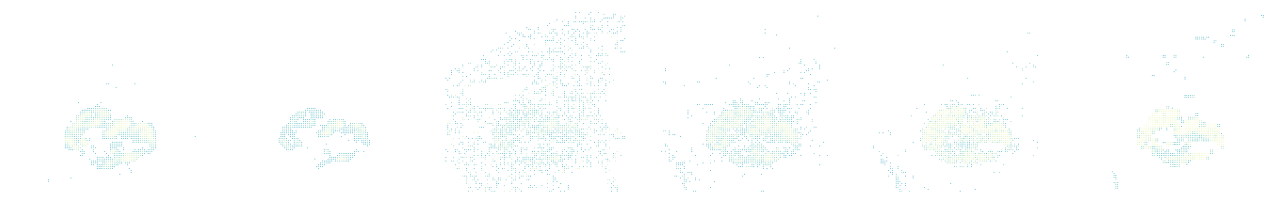

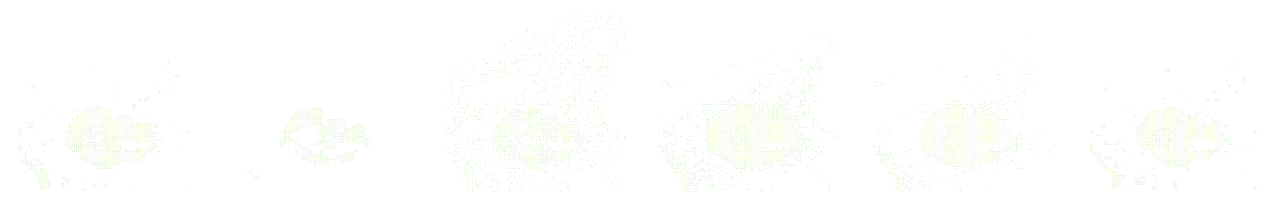

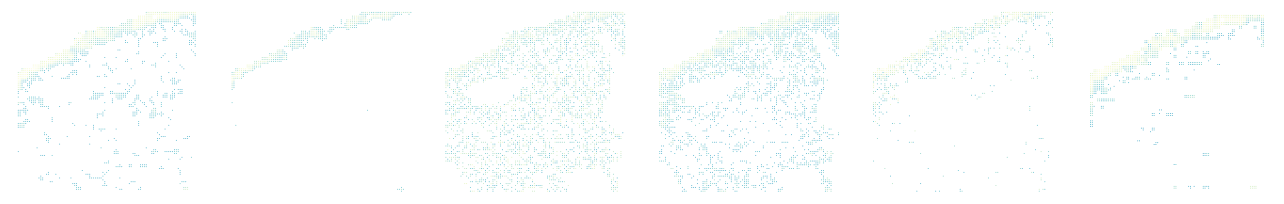

In [27]:
sct_hr_pro_list = [sct_hr_protein_2, sct_hr_protein_3, sct_hr_protein_4, sct_hr_protein_5, sct_hr_protein_6, sct_hr_protein_1]

row = position['row']
col = position['col']

row_en = en_position['row']/2
col_en = en_position['col']/2

def min_max_norm(array):
    return (array - np.min(array))/(np.max(array) - np.min(array))


def min_max_norm_t(array, t=0):
    norm_array = min_max_norm(array)
    return ((norm_array - t) + np.abs((norm_array - t)))/2

def step_norm_t(array, t=0):
    norm_array = min_max_norm(array)
    return np.array([int(l > t) for l in norm_array])

position = pd.read_csv(f'result/{project_name }/position_with_center.csv')
en_position = pd.read_csv(f'result/{project_name }/position_enhance_with_center.csv')

# protein_roi = ['CD98.GCACCAACAGCCATT', 
#             'GPR56.GCCTAGTTTCCGTTT', 
#             'IgM.TAGCGAGCCCGTATA']

protein_roi = ['CD71.CCGTGTTCCTCATTA','CD107a..LAMP.1..CAGCCCACTGCAATA',
            'IgM.TAGCGAGCCCGTATA', ]


row = position['row']
col = position['col']

row_en = en_position['row']/2
col_en = en_position['col']/2


size = 20
cmp = 'YlGnBu_r'
    
width = 5/2 * np.mean(row)

size = 4
t_ = [0.4, 0.7, 0.4]

mapped_region_hr_p_dic = {}
for i in range(len(protein_roi)):
    f, axs = plt.subplots(nrows=1, ncols=6, figsize=(18, 3))
    for kk in range(6):
        sct_hr_gene = sct_hr_pro_list[kk]
        g = protein_roi[i]
        t = t_[i]
        
        axs[kk].scatter(row_en, - col_en, s=size/5 *  step_norm_t(sct_hr_gene[g], t),
                            marker='o',
                            c=sct_hr_gene[g], cmap=cmp, linewidths=0)
        
        # axs[i, kk].scatter(1 * width + row_en, - col_en, s=size/5,
        #             marker='o',
        #             c=sct_hr_gene[g], cmap=cmp)
        axs[kk].axis("equal")
        axs[kk].axis('off')
        axs[kk].set_facecolor('black')
        plt.tight_layout()
    plt.savefig(f'../paper/NNfig/Fig5/supp/p_sct_compare_{i}.pdf')
    plt.show()

In [28]:
mapped_region_hr_p_dic = {}
for kk in range(6):
    print(kk)
    sct_hr_pro = sct_hr_pro_list[kk]
    sct_hr_gene = sct_hr_gene_list[kk]
    for i in range(len(protein_roi)):
        p = protein_roi[i]
        g = gene_roi[i]
        print(p, g)
        print(pearsonr(sct_hr_gene[g], sct_hr_pro[p])[0])

0
CD71.CCGTGTTCCTCATTA FADS1
0.3241247053973848
CD107a..LAMP.1..CAGCCCACTGCAATA RNA18S5
0.3242089556070672
IgM.TAGCGAGCCCGTATA TMEM132D
0.5475661185616827
1
CD71.CCGTGTTCCTCATTA FADS1
0.4274426943084063
CD107a..LAMP.1..CAGCCCACTGCAATA RNA18S5
0.45742184592164126
IgM.TAGCGAGCCCGTATA TMEM132D
0.2859516182240971
2
CD71.CCGTGTTCCTCATTA FADS1
0.028835741278174076
CD107a..LAMP.1..CAGCCCACTGCAATA RNA18S5
0.02804173307457658
IgM.TAGCGAGCCCGTATA TMEM132D
-0.11667615188004496
3
CD71.CCGTGTTCCTCATTA FADS1
0.280665103395366
CD107a..LAMP.1..CAGCCCACTGCAATA RNA18S5
0.0848501380423049
IgM.TAGCGAGCCCGTATA TMEM132D
-0.11806524067384842
4
CD71.CCGTGTTCCTCATTA FADS1
0.4266315797929709
CD107a..LAMP.1..CAGCCCACTGCAATA RNA18S5
0.1950507563238853
IgM.TAGCGAGCCCGTATA TMEM132D
0.0491108820418851
5
CD71.CCGTGTTCCTCATTA FADS1
0.6221501686794076
CD107a..LAMP.1..CAGCCCACTGCAATA RNA18S5
0.36380147605777396
IgM.TAGCGAGCCCGTATA TMEM132D
0.6083050907212341
